In [1]:
import multimodal_cci as mmcci
import scanpy as sc

#### Load stLearn data objects

In [2]:
brain_aged_tech1 = [
    sc.read_h5ad("/QRISdata/Q5058/sMACS/Visium/Processed/Brain/CCI/VLP40_1C_CCI.h5ad"),
    sc.read_h5ad("/QRISdata/Q5058/sMACS/Visium/Processed/Brain/CCI/VLP40_1D_CCI.h5ad"),
    sc.read_h5ad("/QRISdata/Q5058/sMACS/Visium/Processed/Brain/CCI/VLP41_1B_CCI.h5ad"),
    sc.read_h5ad("/QRISdata/Q5058/sMACS/Visium/Processed/Brain/CCI/VLP41_1D_CCI.h5ad")
    ]

brain_young_tech1 = [
    sc.read_h5ad("/QRISdata/Q5058/sMACS/Visium/Processed/Brain/CCI/VLP40_1A_CCI.h5ad"),
    sc.read_h5ad("/QRISdata/Q5058/sMACS/Visium/Processed/Brain/CCI/VLP40_1B_CCI.h5ad"),
    sc.read_h5ad("/QRISdata/Q5058/sMACS/Visium/Processed/Brain/CCI/VLP41_1A_CCI.h5ad"),
    sc.read_h5ad("/QRISdata/Q5058/sMACS/Visium/Processed/Brain/CCI/VLP41_1C_CCI.h5ad")
    ]

brain_aged_tech2 = [
    sc.read_h5ad("/QRISdata/Q5058/sMACS/STomics/Processed/Brain/CCI_new/brain_A1_CCI_bin80.h5ad"),
    sc.read_h5ad("/QRISdata/Q5058/sMACS/STomics/Processed/Brain/CCI_new/brain_A4_CCI_bin80.h5ad")
    ]
brain_young_tech2 = [
    sc.read_h5ad("/QRISdata/Q5058/sMACS/STomics/Processed/Brain/CCI_new/brain_Y1_CCI_bin80.h5ad"),
    sc.read_h5ad("/QRISdata/Q5058/sMACS/STomics/Processed/Brain/CCI_new/brain_Y4_CCI_bin80.h5ad")
    ]

brain_aged_tech1_cci = [sample.uns['per_lr_cci_cell_type'] for sample in brain_aged_tech1]
brain_young_tech1_cci = [sample.uns['per_lr_cci_cell_type'] for sample in brain_young_tech1]
brain_aged_tech2_cci = [sample.uns['per_lr_cci_cell_type'] for sample in brain_aged_tech2]
brain_young_tech2_cci = [sample.uns['per_lr_cci_cell_type'] for sample in brain_young_tech2]

brain_aged_tech1_sizes = [sample.shape[0] for sample in brain_aged_tech1]
brain_young_tech1_sizes = [sample.shape[0] for sample in brain_young_tech1]
brain_aged_tech2_sizes = [sample.shape[0] for sample in brain_aged_tech2]
brain_young_tech2_sizes = [sample.shape[0] for sample in brain_young_tech2]

In [3]:
from matplotlib import pyplot as plt

colors = {
    'Ependymal': plt.colormaps.get_cmap('tab10').colors[0],
    'Astrocytes': plt.colormaps.get_cmap('tab10').colors[1],
    'Vascular': plt.colormaps.get_cmap('tab10').colors[2],
    'Oligos': plt.colormaps.get_cmap('tab10').colors[3],
    'Neurons': plt.colormaps.get_cmap('tab10').colors[4],
    'Microglia': plt.colormaps.get_cmap('tab10').colors[5],
    'Immune': plt.colormaps.get_cmap('tab10').colors[6]
}

#### Normalise each group of samples

In [4]:
brain_aged_tech1_normalised = mmcci.it.normalise_within_tech(brain_aged_tech1_cci, brain_aged_tech1_sizes, target=brain_young_tech1_sizes[0])
brain_young_tech1_normalised = mmcci.it.normalise_within_tech(brain_young_tech1_cci, brain_young_tech1_sizes, target=brain_young_tech1_sizes[0])
brain_aged_tech2_normalised = mmcci.it.normalise_within_tech(brain_aged_tech2_cci, brain_aged_tech2_sizes, target=brain_young_tech2_sizes[0])
brain_young_tech2_normalised = mmcci.it.normalise_within_tech(brain_young_tech2_cci, brain_young_tech2_sizes, target=brain_young_tech2_sizes[0])

In [5]:
# for sample in brain_young_tech2_normalised:
#     overall_sample = mmcci.it.calculate_overall_interactions(sample)
#     mmcci.plt.network_plot(overall_sample, text_size=26, node_size=1500, edge_weight=30, node_label_dist=1.1)

#### Integrate within technologies

In [6]:
brain_aged_tech1_integrated = mmcci.it.integrate_samples(brain_aged_tech1_normalised)
brain_young_tech1_integrated = mmcci.it.integrate_samples(brain_young_tech1_normalised)
brain_aged_tech2_integrated = mmcci.it.integrate_samples(brain_aged_tech2_normalised)
brain_young_tech2_integrated = mmcci.it.integrate_samples(brain_young_tech2_normalised)

In [7]:
# overall_sample = mmcci.it.calculate_overall_interactions(brain_young_tech2_integrated)
# mmcci.plt.network_plot(overall_sample, text_size=26, node_size=1500, edge_weight=30, node_label_dist=1.1)

#### Normalise samples between technologies

In [8]:
aged_normalised = mmcci.it.normalise_between_tech([brain_aged_tech1_integrated, brain_aged_tech2_integrated])
young_normalised = mmcci.it.normalise_between_tech([brain_young_tech1_integrated, brain_young_tech2_integrated])

#### Integrate between technologies for both groups

In [9]:
aged_integrated = mmcci.it.integrate_samples(aged_normalised)
young_integrated = mmcci.it.integrate_samples(young_normalised)

#### Calculate overall interactions network per group

In [10]:
aged_overall = mmcci.it.calculate_overall_interactions(aged_integrated)
young_overall = mmcci.it.calculate_overall_interactions(young_integrated)

# mmcci.plt.network_plot(aged_overall, text_size=26, node_size=1500, edge_weight=30, node_label_dist=1.1)
# mmcci.plt.network_plot(young_overall, text_size=26, node_size=1500, edge_weight=30, node_label_dist=1.1)

# mmcci.plt.chord_plot(aged_overall, colors=colors)
# mmcci.plt.chord_plot(young_overall, colors=colors)

#### Rank LR pairs based on dissimilarity between groups

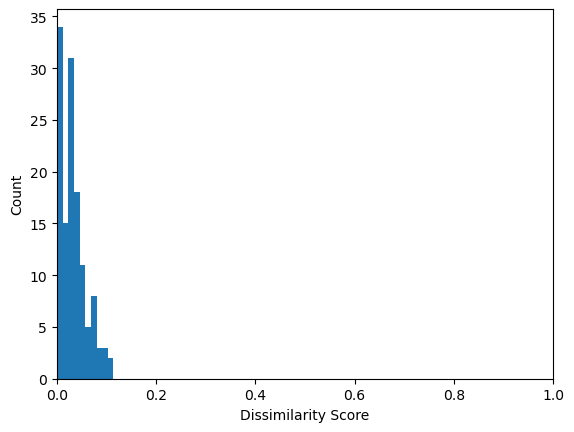

Overall Network Aged vs Young Dissimilarity Score is: 0.23906891519232853


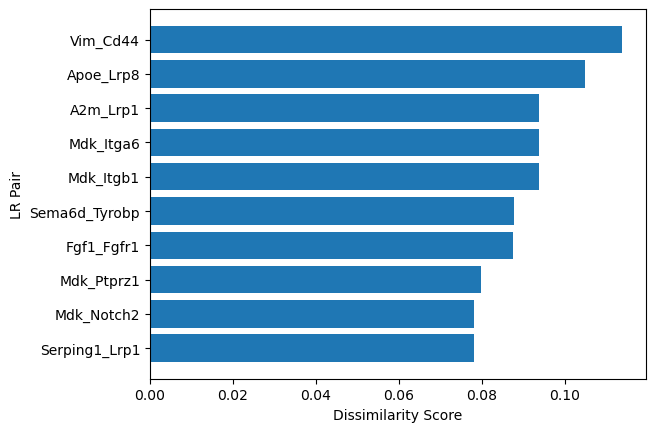

In [11]:
dissimilarity_scores = mmcci.an.calculate_dissim(aged_integrated, young_integrated)
mmcci.plt.dissim_hist(dissimilarity_scores)
    
## Sort LR Pairs from high to low dissimilarities
print("Overall Network Aged vs Young Dissimilarity Score is: " + str(mmcci.sc.dissimilarity_score(aged_overall, young_overall)))

mmcci.plt.lr_top_dissimilarity(dissimilarity_scores)

#### Plot highly dissimilar pairs between groups

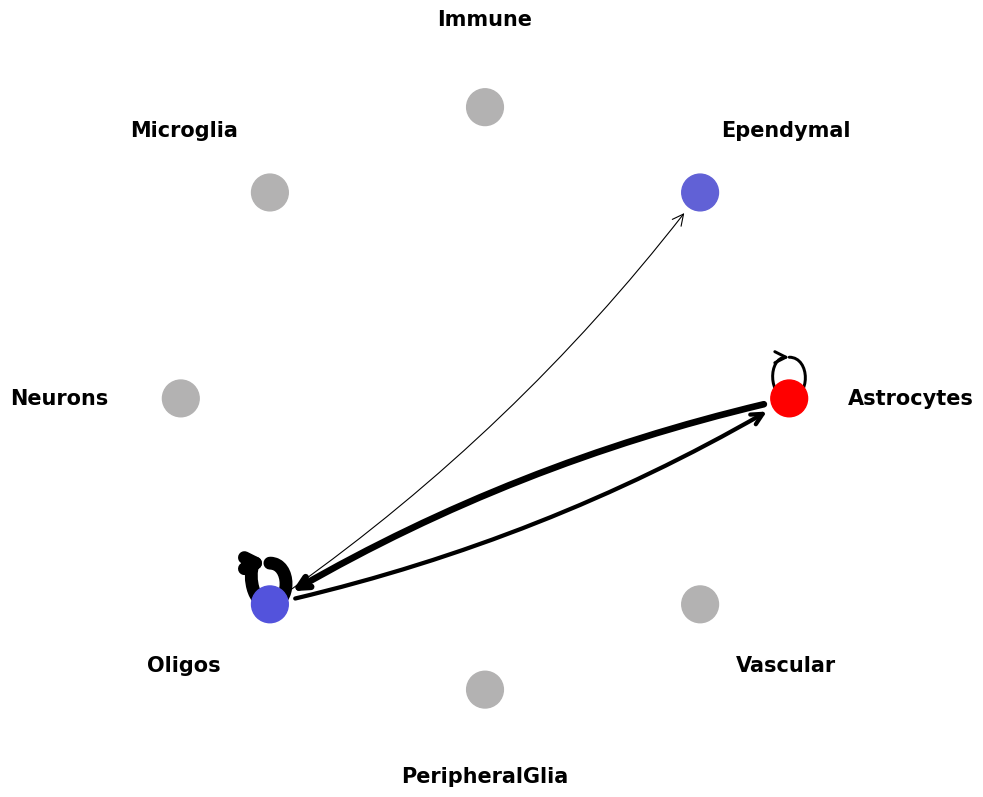

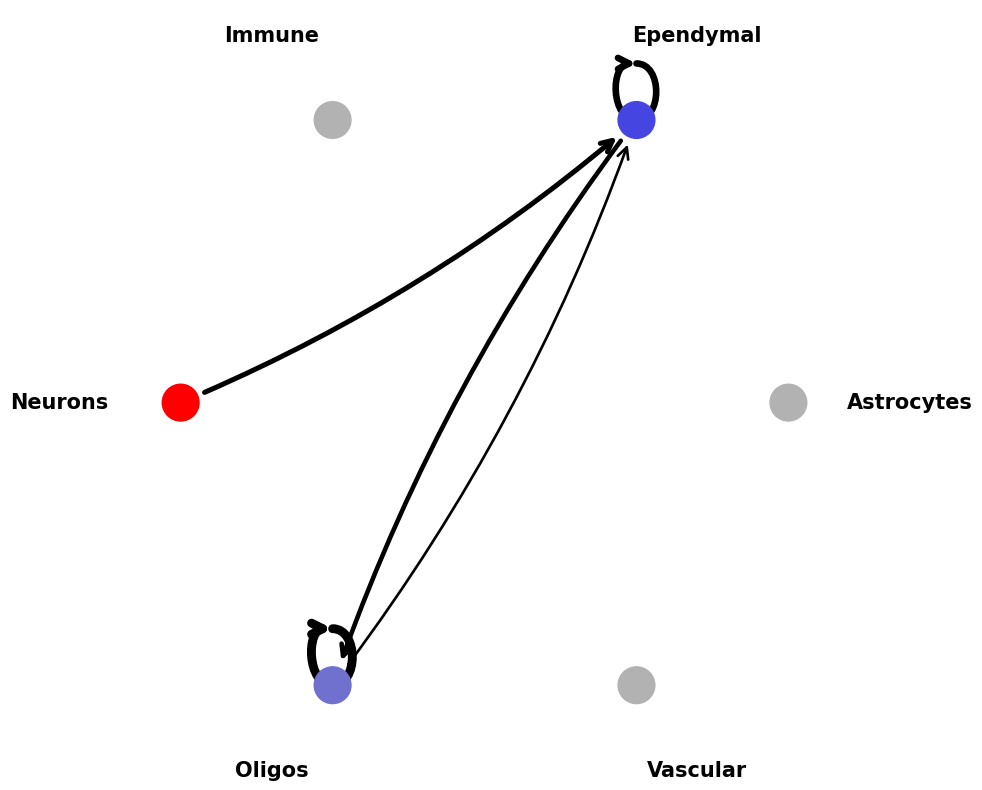

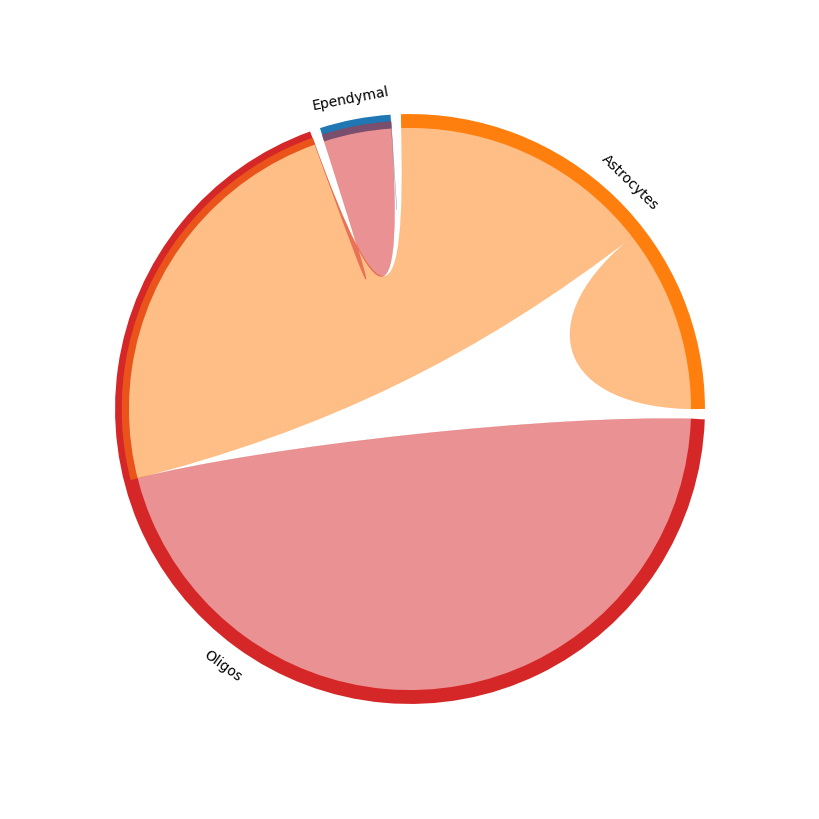

/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/multimodal_cci/plot_helper.py:184: RuntimeWarning: invalid value encountered in divide
  z = (X[i, :] / x[i].astype(float)) * (end - start)


ValueError: cannot convert float NaN to integer

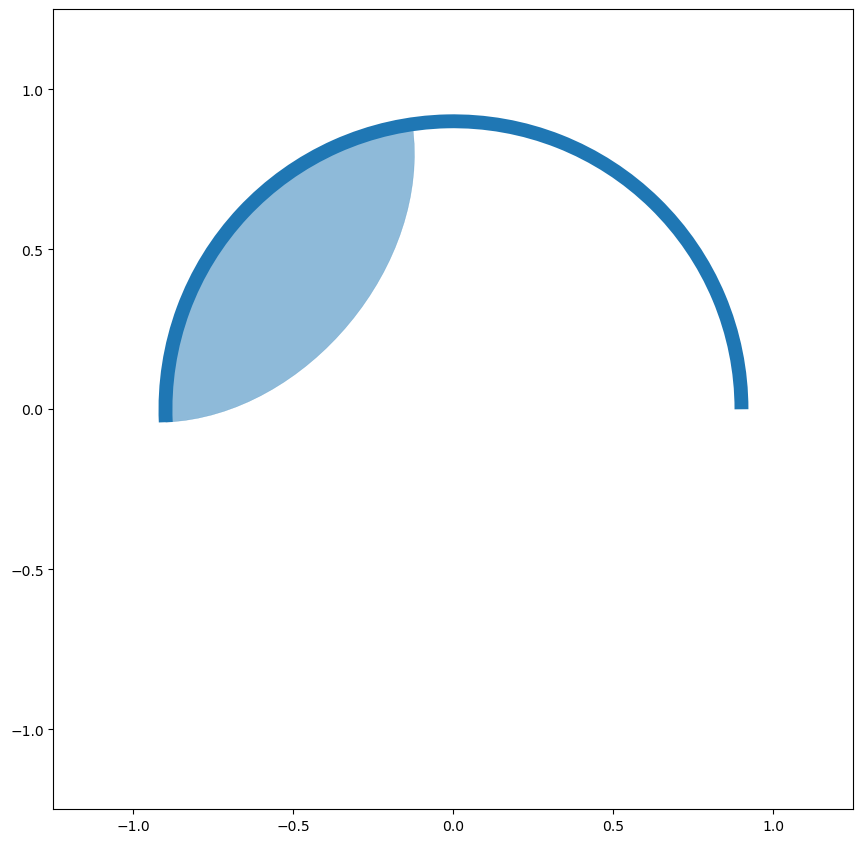

In [12]:
mmcci.plt.network_plot(aged_integrated['Vim_Cd44'])
mmcci.plt.network_plot(young_integrated['Vim_Cd44'])

mmcci.plt.chord_plot(aged_integrated['Vim_Cd44'], colors=colors)
mmcci.plt.chord_plot(young_integrated['Vim_Cd44'], colors=colors)

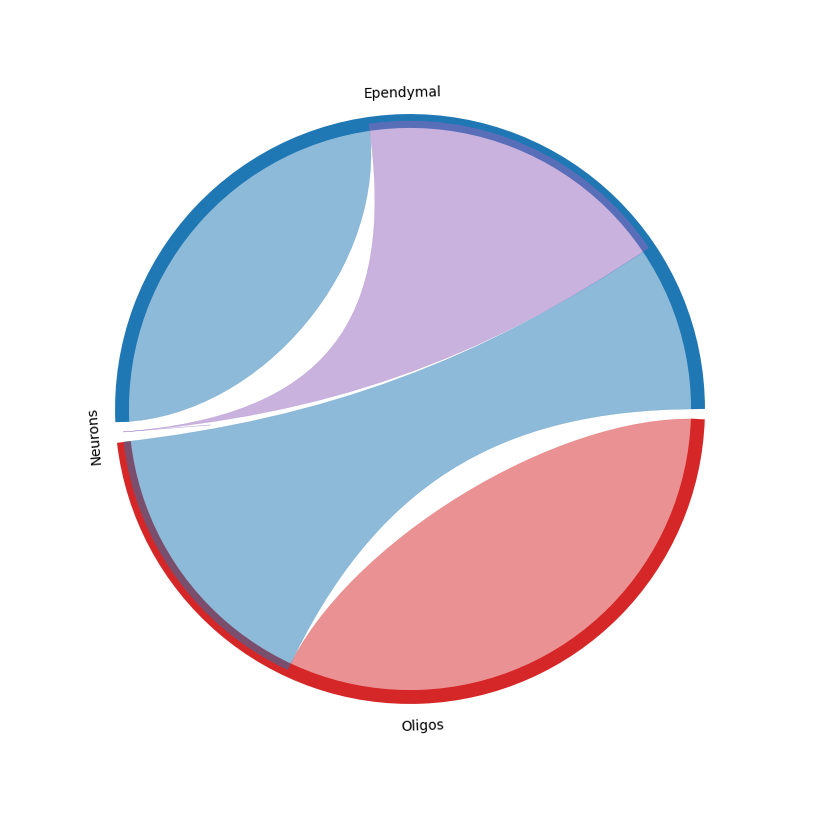

In [45]:
chord_plot(young_integrated['Vim_Cd44'], colors=colors)

In [14]:
young_integrated['Vim_Cd44']

Astrocytes  Ependymal  Immune  Neurons     Oligos  Vascular
Astrocytes         0.0   0.000000     0.0      0.0   0.000000       0.0
Ependymal          0.0  49.298263     0.0      0.0  34.073533       0.0
Immune             0.0   0.000000     0.0      0.0   0.000000       0.0
Neurons            0.0  37.542112     0.0      0.0   0.000000       0.0
Oligos             0.0  19.854455     0.0      0.0  66.108376       0.0
Vascular           0.0   0.000000     0.0      0.0   0.000000       0.0

#### Calculate p values for significance changes between groups

In [13]:
p_values = mmcci.an.perm_test(aged_overall, young_overall)
p_values

Astrocytes  Ependymal    Immune  Microglia   Neurons  \
Astrocytes        0.054150   0.241320  0.242155   0.242055  0.069365   
Ependymal         0.219475   0.031755  0.243480   0.242145  0.125185   
Immune            0.240215   0.243795  0.241560   0.243115  0.242265   
Microglia         0.241895   0.241650  0.242980   0.240990  0.242195   
Neurons           0.093195   0.126415  0.241695   0.242045  0.038820   
Oligos            0.196070   0.219265  0.242190   0.243575  0.155495   
PeripheralGlia    0.242265   0.240615  0.243835   0.241300  0.241385   
Vascular          0.218410   0.241750  0.243325   0.241690  0.202670   

                  Oligos  PeripheralGlia  Vascular  
Astrocytes      0.195850        0.242330  0.242500  
Ependymal       0.219045        0.242840  0.242405  
Immune          0.243975        0.241570  0.240735  
Microglia       0.242760        0.241335  0.242245  
Neurons         0.140235        0.244030  0.218105  
Oligos          0.008045        0.242460  0.243065  
PeripheralGlia  0.241410        0.243060  0.241260  
Vascular        0.241840        0.240935  0.241665

In [14]:
aged_overall

Astrocytes  Ependymal  Immune  Microglia   Neurons    Oligos  \
Astrocytes        0.151941   0.000000     0.0        0.0  0.061478  0.023039   
Ependymal         0.000000   0.050767     0.0        0.0  0.009693  0.000178   
Immune            0.000000   0.000000     0.0        0.0  0.000000  0.000000   
Microglia         0.000000   0.000000     0.0        0.0  0.000000  0.000000   
Neurons           0.045250   0.011242     0.0        0.0  0.077193  0.019068   
Oligos            0.022707   0.000321     0.0        0.0  0.009539  0.494113   
PeripheralGlia    0.000000   0.000000     0.0        0.0  0.000000  0.000000   
Vascular          0.002579   0.000000     0.0        0.0  0.015530  0.000000   

                PeripheralGlia  Vascular  
Astrocytes                 0.0  0.001210  
Ependymal                  0.0  0.000000  
Immune                     0.0  0.000000  
Microglia                  0.0  0.000000  
Neurons                    0.0  0.004155  
Oligos                     0.0  0.000000  
PeripheralGlia             0.0  0.000000  
Vascular                   0.0  0.000000

In [15]:
young_overall

Astrocytes  Ependymal  Immune   Neurons    Oligos  Vascular
Astrocytes    0.050731   0.000000     0.0  0.023505  0.000000       0.0
Ependymal     0.001653   0.222686     0.0  0.027040  0.001956       0.0
Immune        0.000000   0.000000     0.0  0.000000  0.000000       0.0
Neurons       0.019959   0.025750     0.0  0.074074  0.014581       0.0
Oligos        0.000000   0.001431     0.0  0.012218  0.524416       0.0
Vascular      0.000000   0.000000     0.0  0.000000  0.000000       0.0

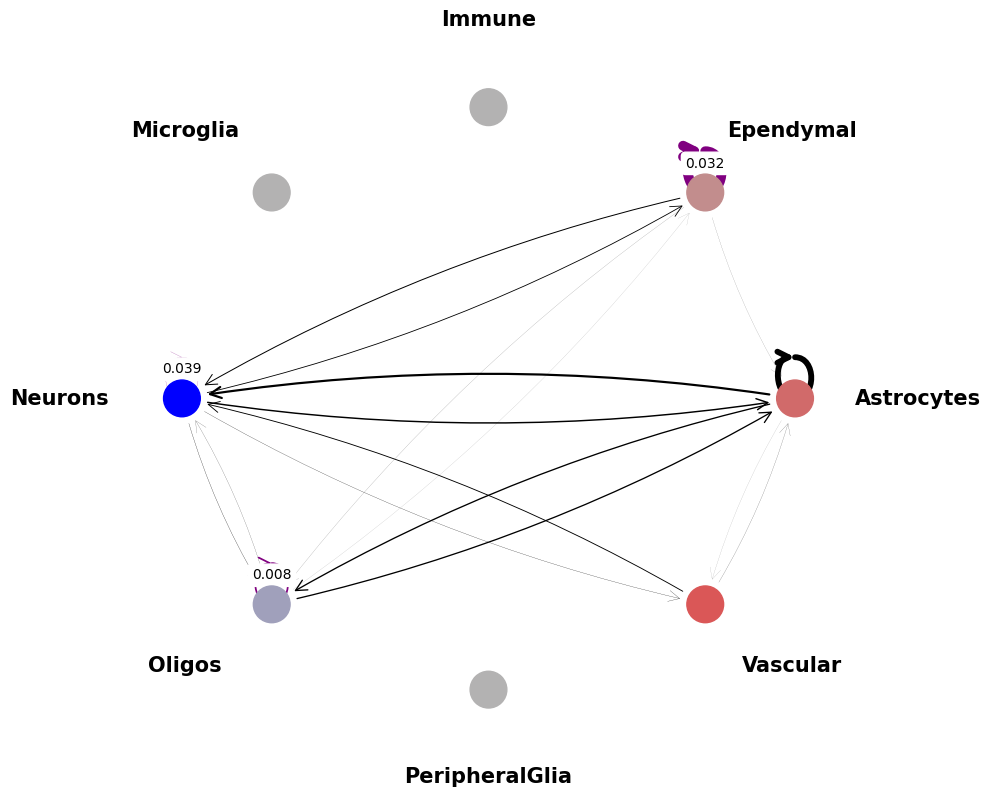

In [19]:
mmcci.plt.network_plot(abs(aged_overall - young_overall).fillna(0), p_values)

#### Plot aged and young overall networks

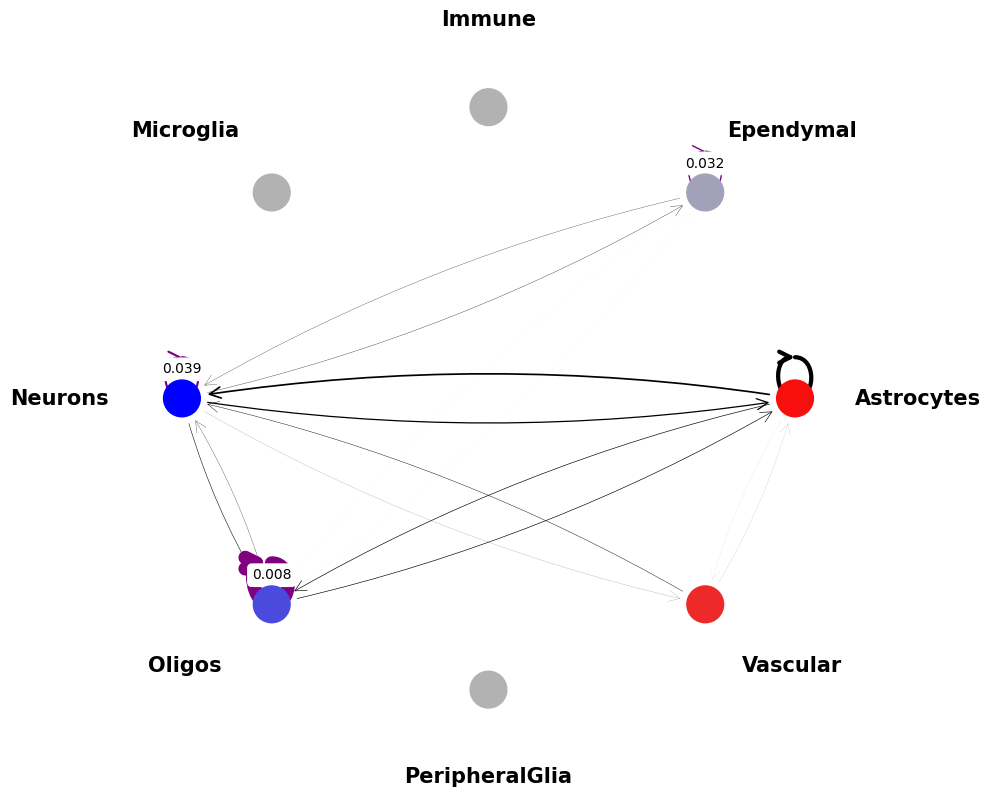

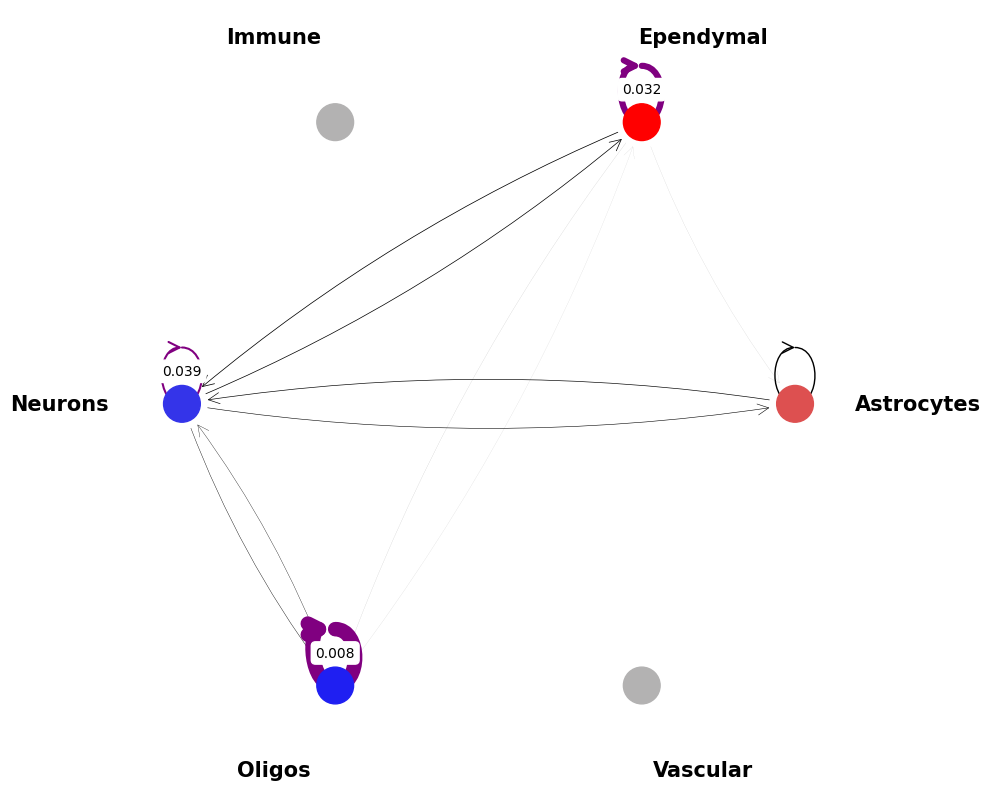

In [20]:
mmcci.plt.network_plot(aged_overall, p_values)
mmcci.plt.network_plot(young_overall, p_values)

#### Get LR pairs from Astrocytes to Neurons

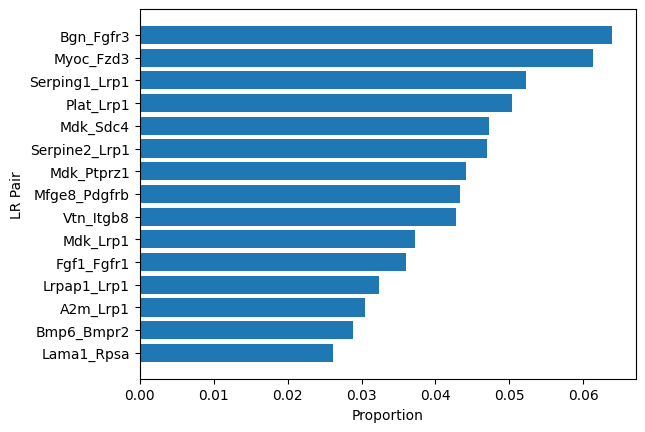

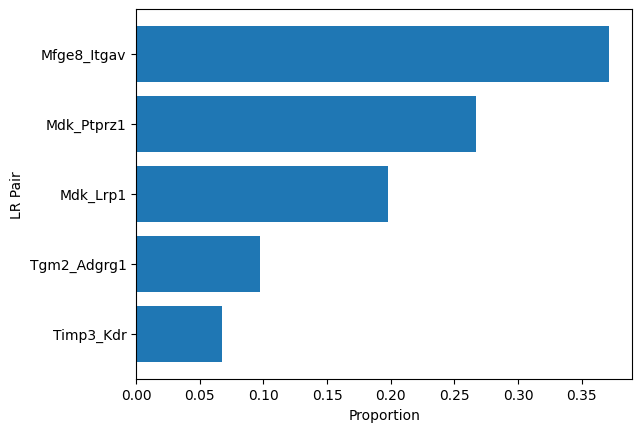

In [21]:
mmcci.plt.lrs_per_celltype(aged_integrated, "Astrocytes", "Neurons", n=15)
mmcci.plt.lrs_per_celltype(young_integrated, "Astrocytes", "Neurons", n=15)

#### Cluster Aged and Young LR Pairs

Computing Dissimilarity Scores for multiple interactions...


Processing: 100%|██████████| 131/131 [00:06<00:00, 20.33it/s]


Computing Principal Components of weighted graph ...
Performing Clustering and Ranking within clusters...
Computing Dissimilarity Scores for single interactions...


Processing: 100%|██████████| 154/154 [00:08<00:00, 18.22it/s]


Computing Principal Components of weighted graph ...
Performing Clustering and Ranking within clusters...

cluster0: Contains 22 LR pairs


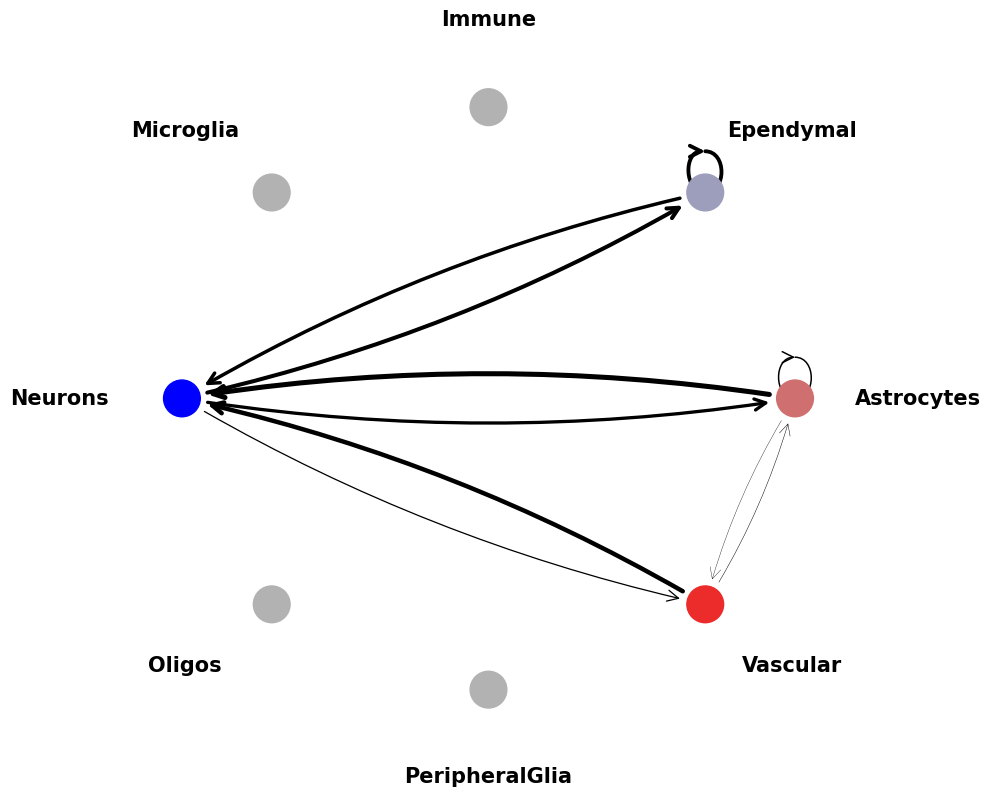


cluster1: Contains 22 LR pairs


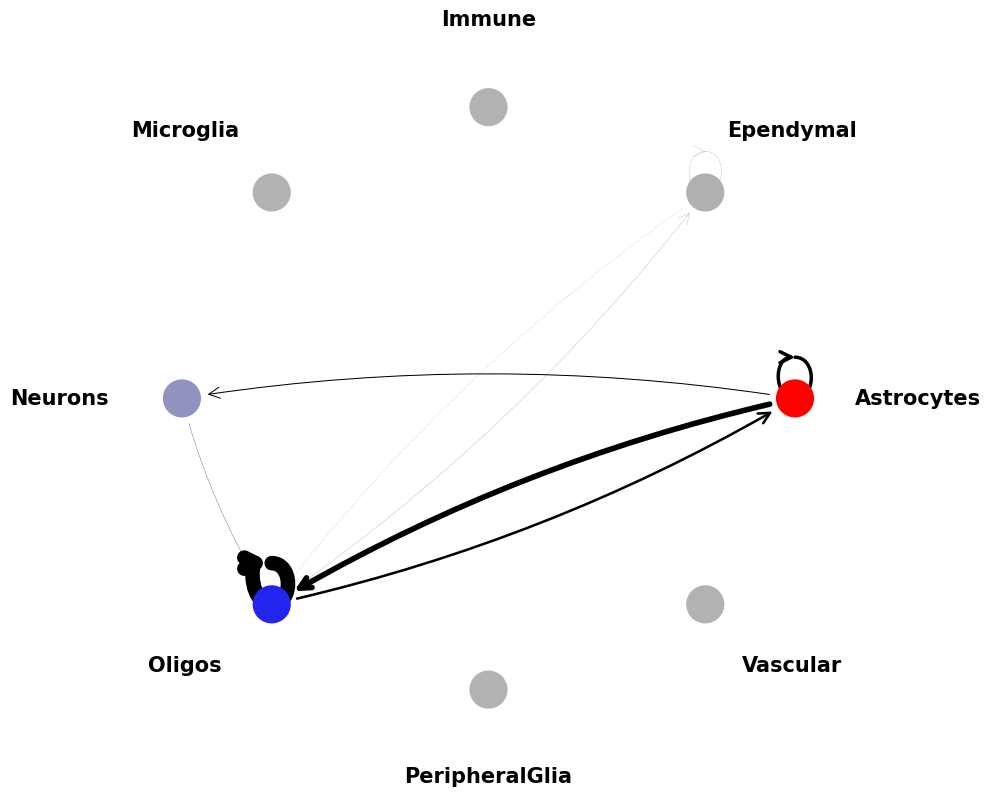


cluster2: Contains 14 LR pairs


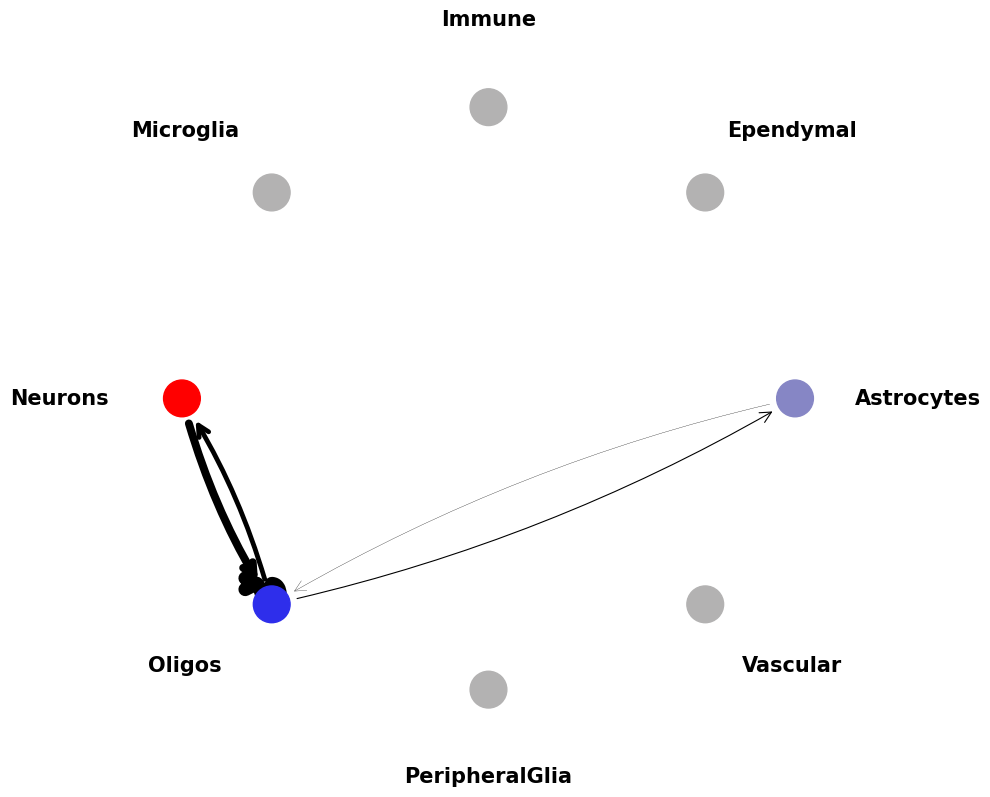


cluster3: Contains 28 LR pairs


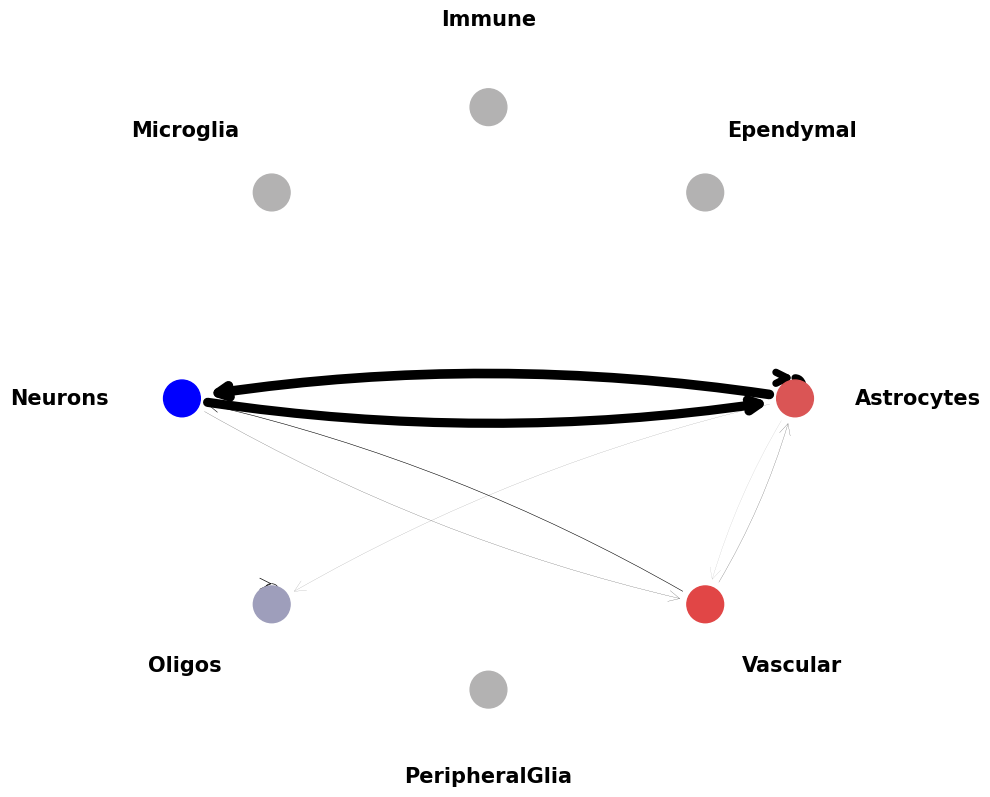


cluster4: Contains 19 LR pairs


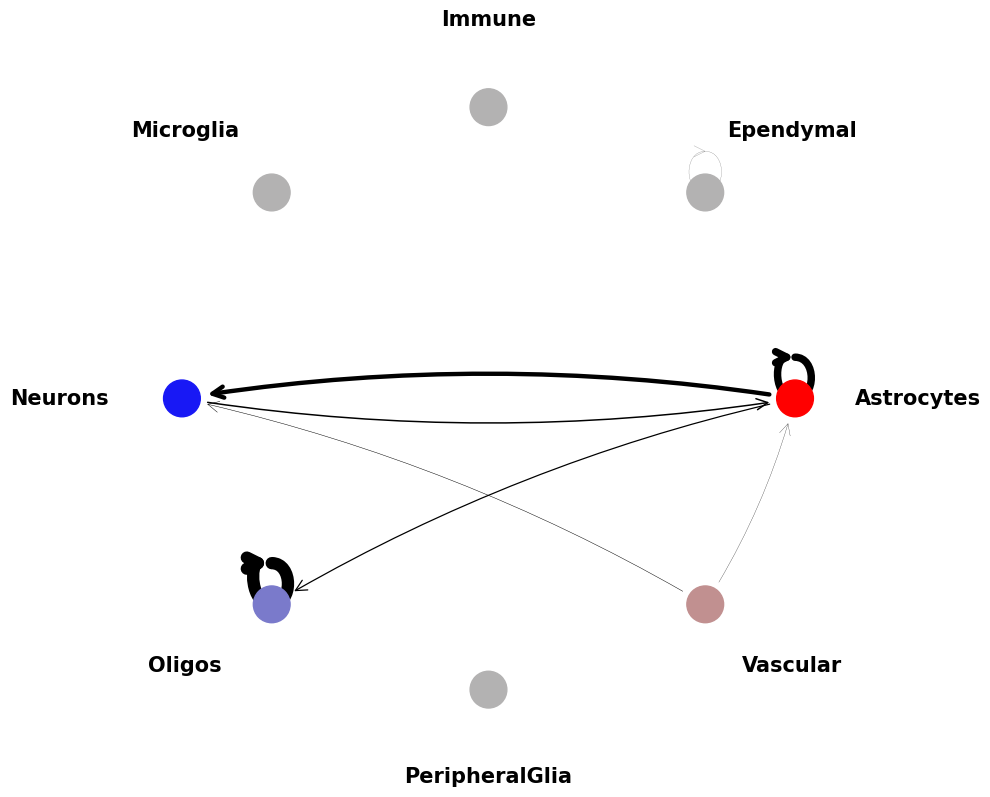


cluster5: Contains 6 LR pairs


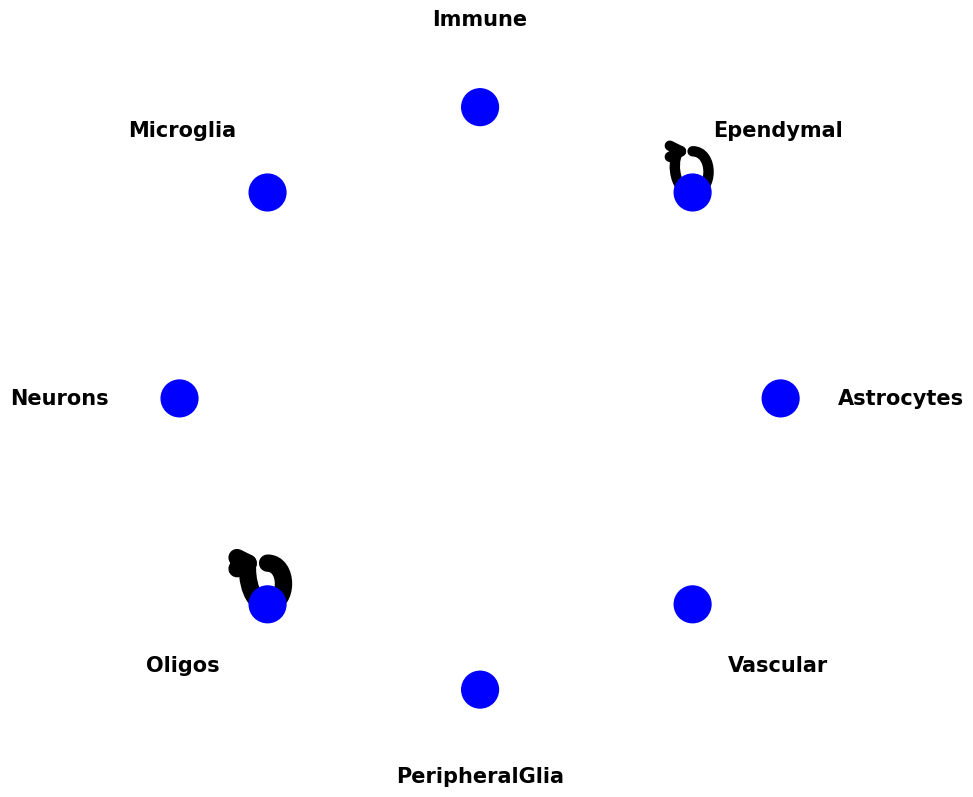


cluster6: Contains 20 LR pairs


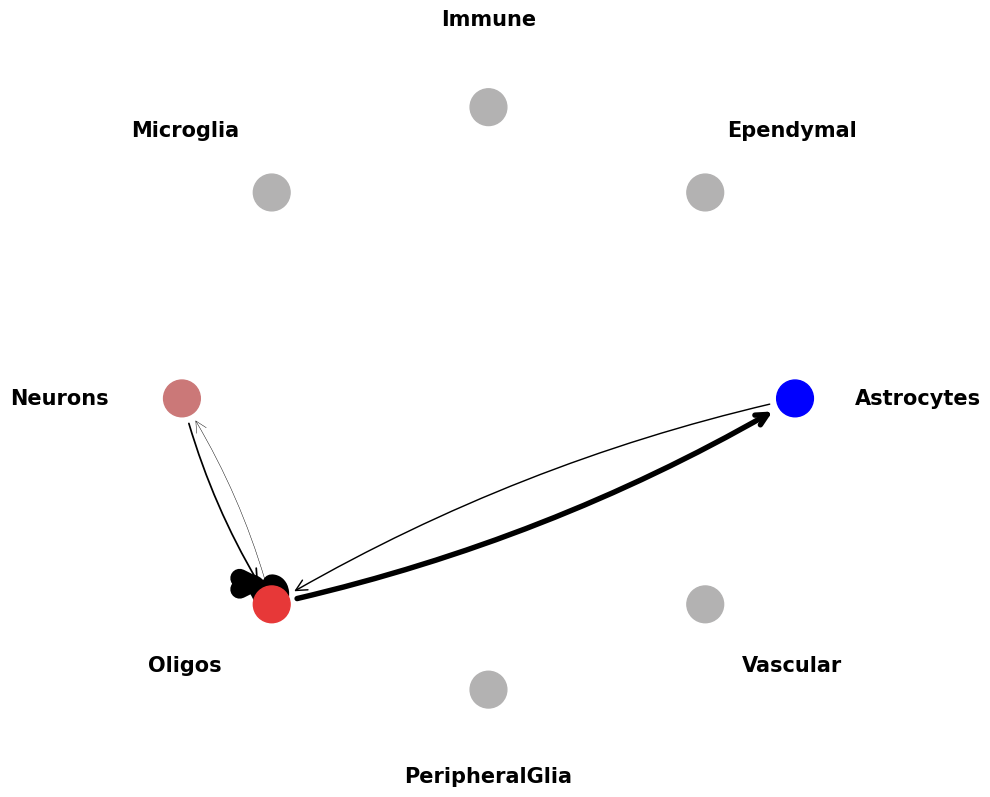


cluster7: Contains 42 LR pairs


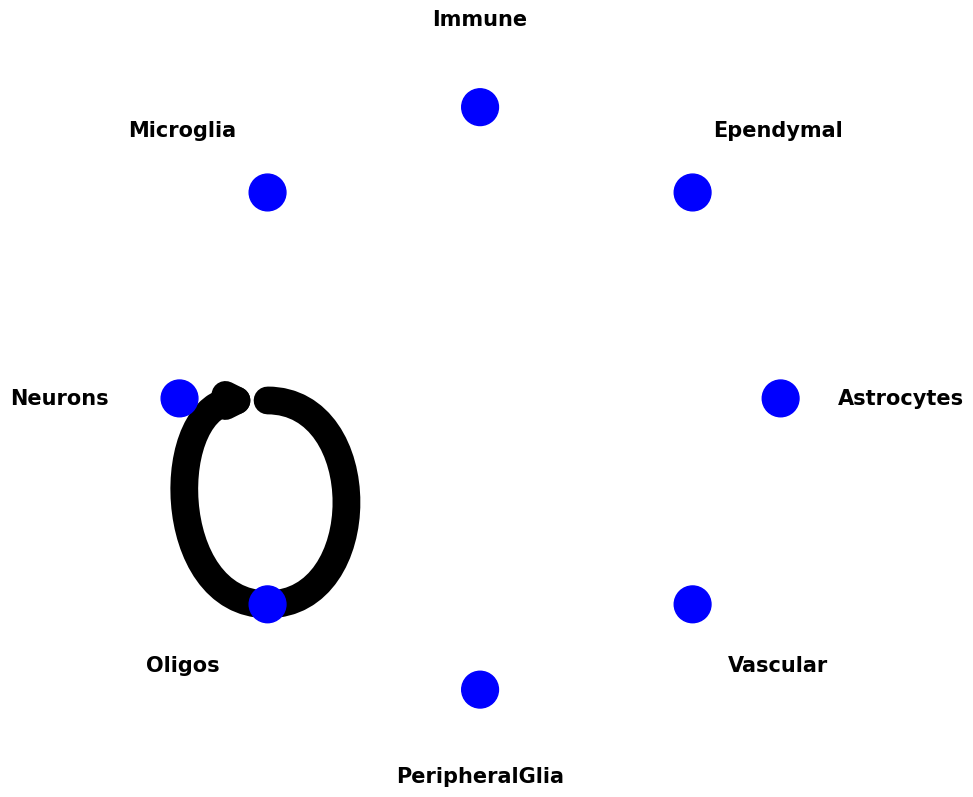


cluster8: Contains 58 LR pairs


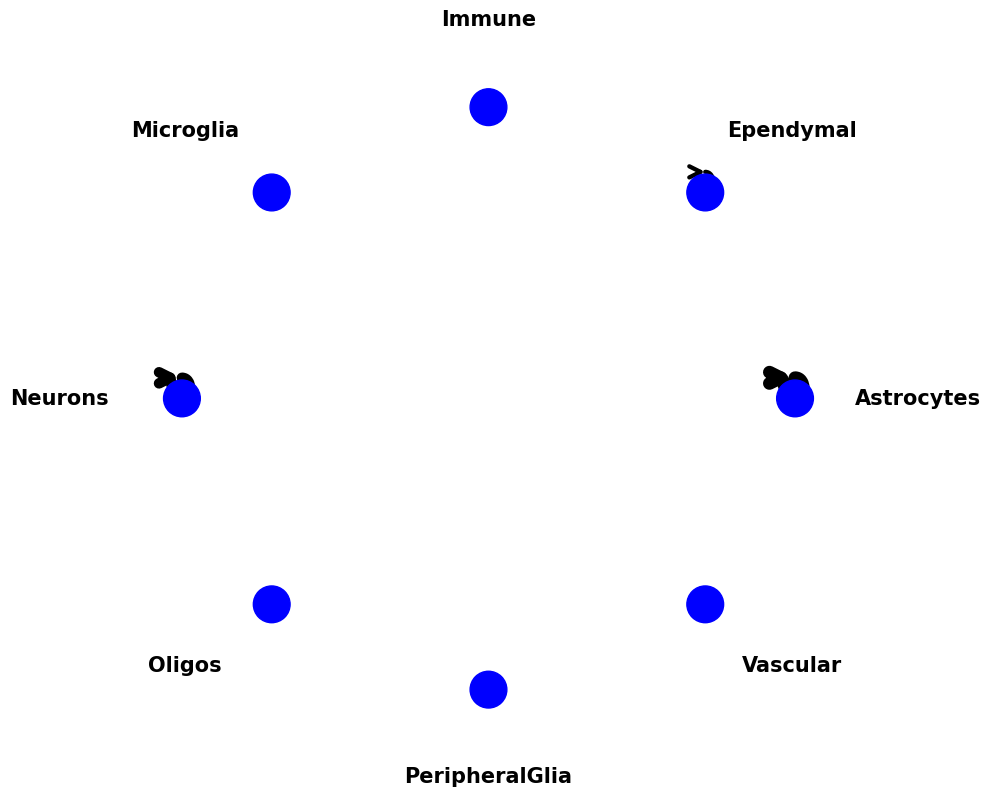


cluster9: Contains 15 LR pairs


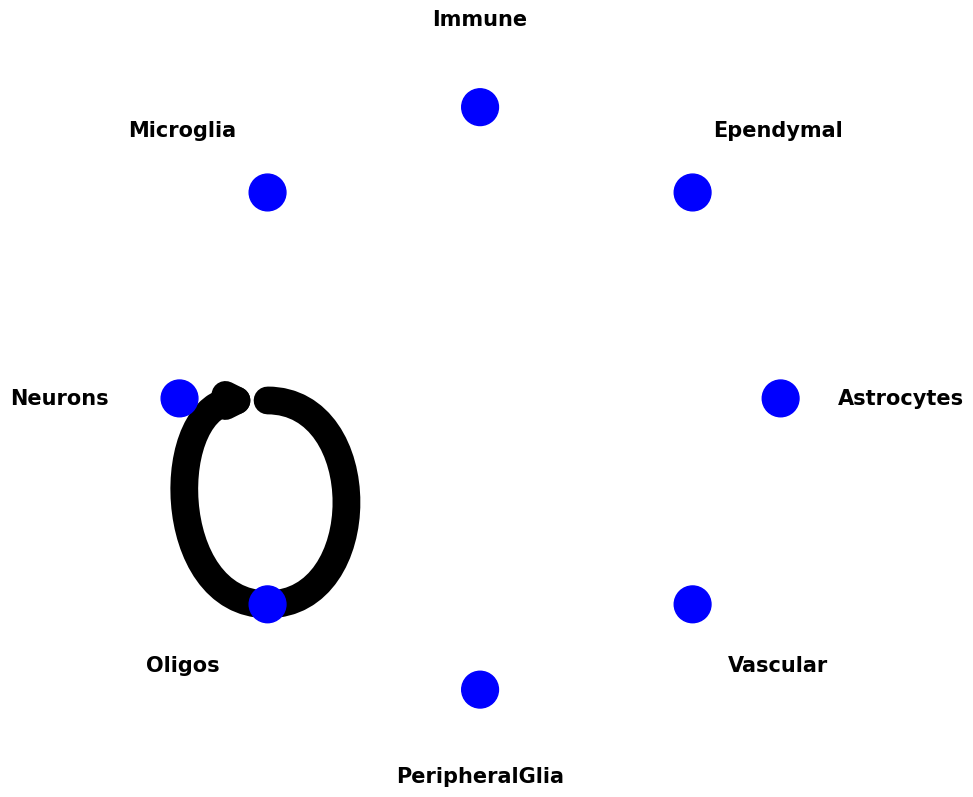


cluster10: Contains 39 LR pairs


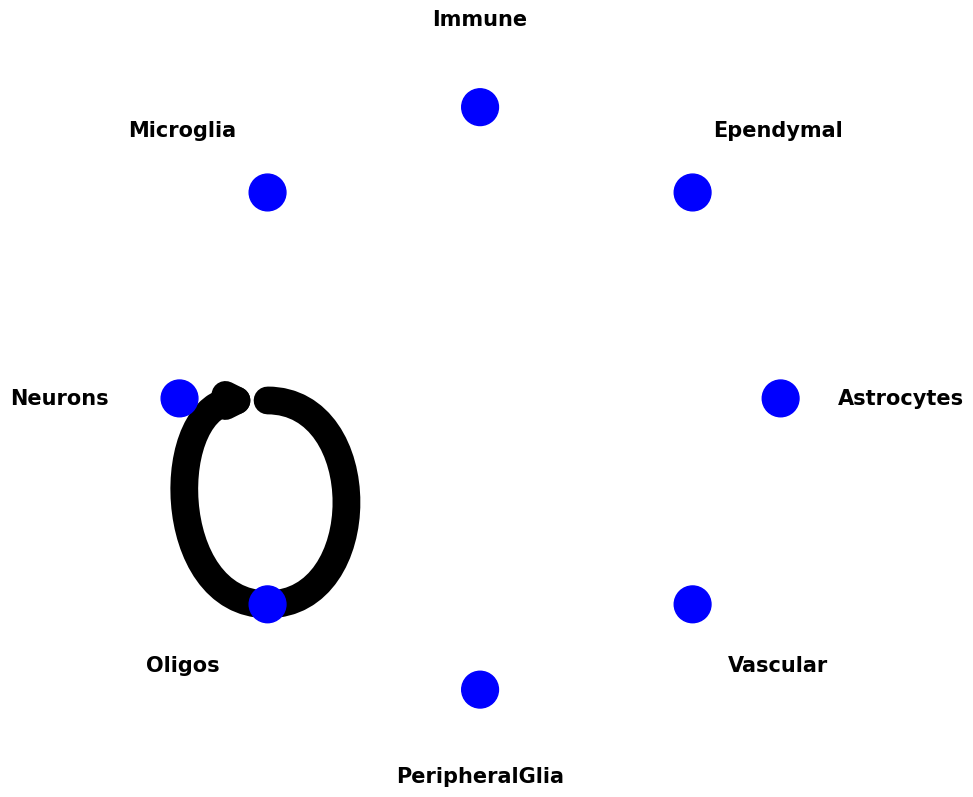

In [22]:
aged_clusters = mmcci.an.lr_grouping(aged_integrated, n_clusters=0)
aged_integrated_clusters = mmcci.an.subset_clusters(aged_integrated, aged_clusters)
aged_overall_clusters = mmcci.an.calculate_cluster_interactions(aged_integrated_clusters)

for cluster, matrix in aged_overall_clusters.items():
    print("\ncluster" + str(cluster) + ": Contains " + str(len(aged_integrated_clusters[cluster])) + " LR pairs")
    mmcci.plt.network_plot(matrix)

Computing Dissimilarity Scores for multiple interactions...


Processing: 100%|██████████| 37/37 [00:00<00:00, 75.98it/s]


Computing Principal Components of weighted graph ...
Performing Clustering and Ranking within clusters...
Computing Dissimilarity Scores for single interactions...


Processing: 100%|██████████| 98/98 [00:03<00:00, 28.43it/s]


Computing Principal Components of weighted graph ...
Performing Clustering and Ranking within clusters...

cluster0: Contains 14 LR pairs


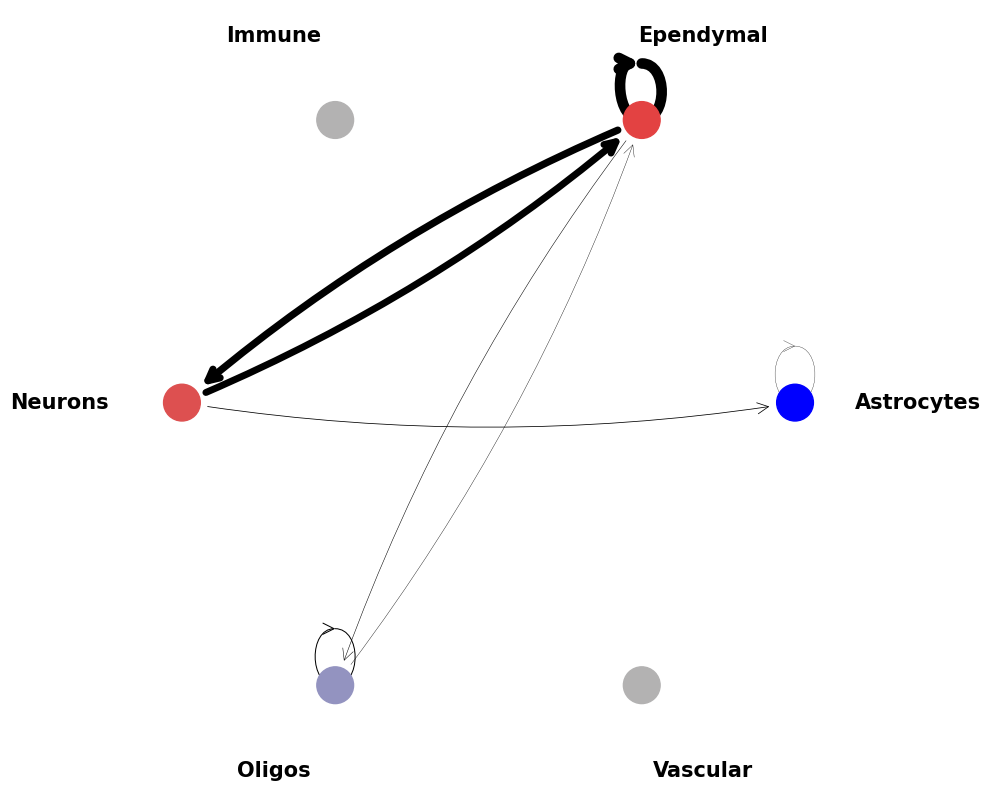


cluster1: Contains 23 LR pairs


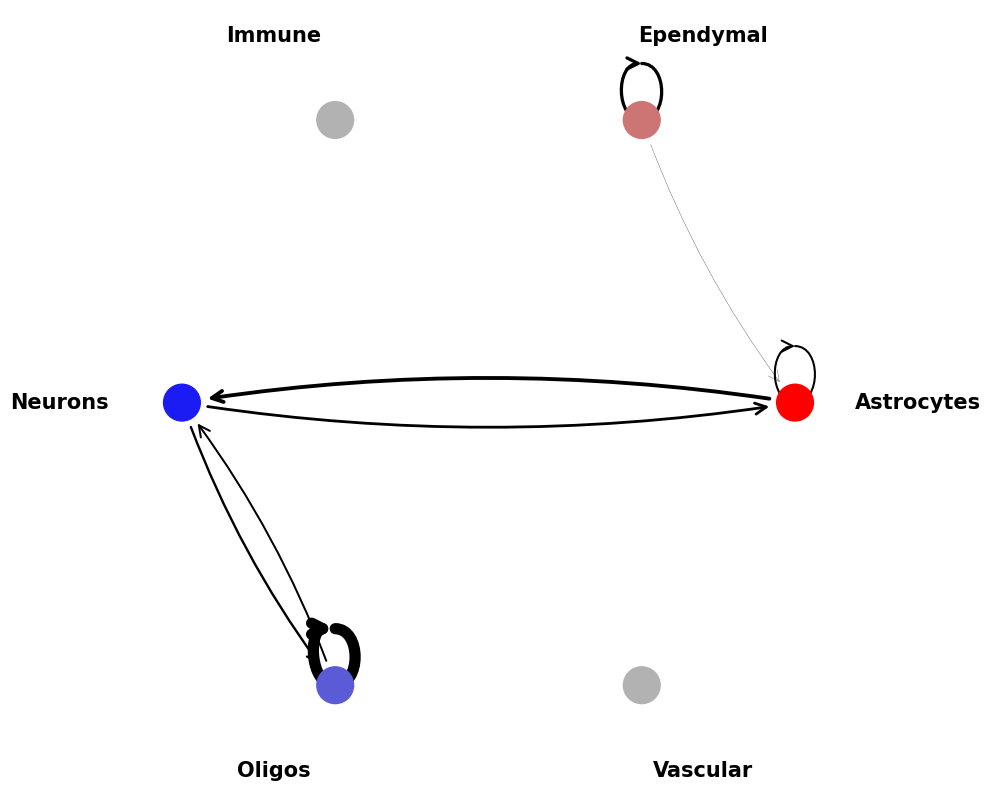


cluster2: Contains 61 LR pairs


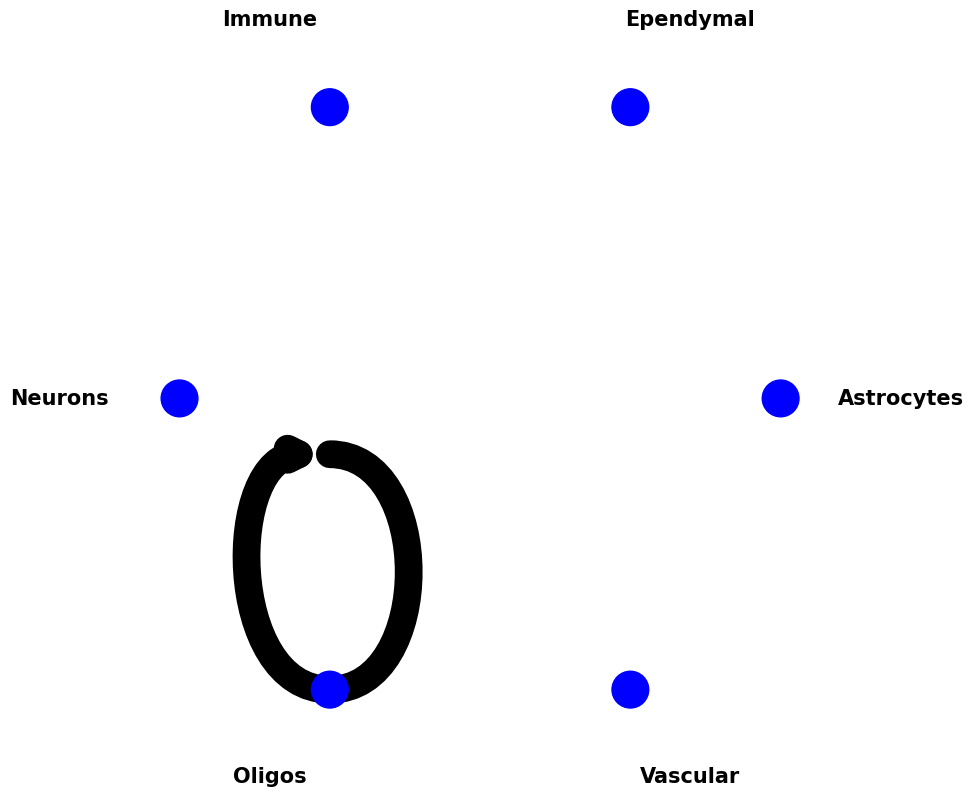


cluster3: Contains 37 LR pairs


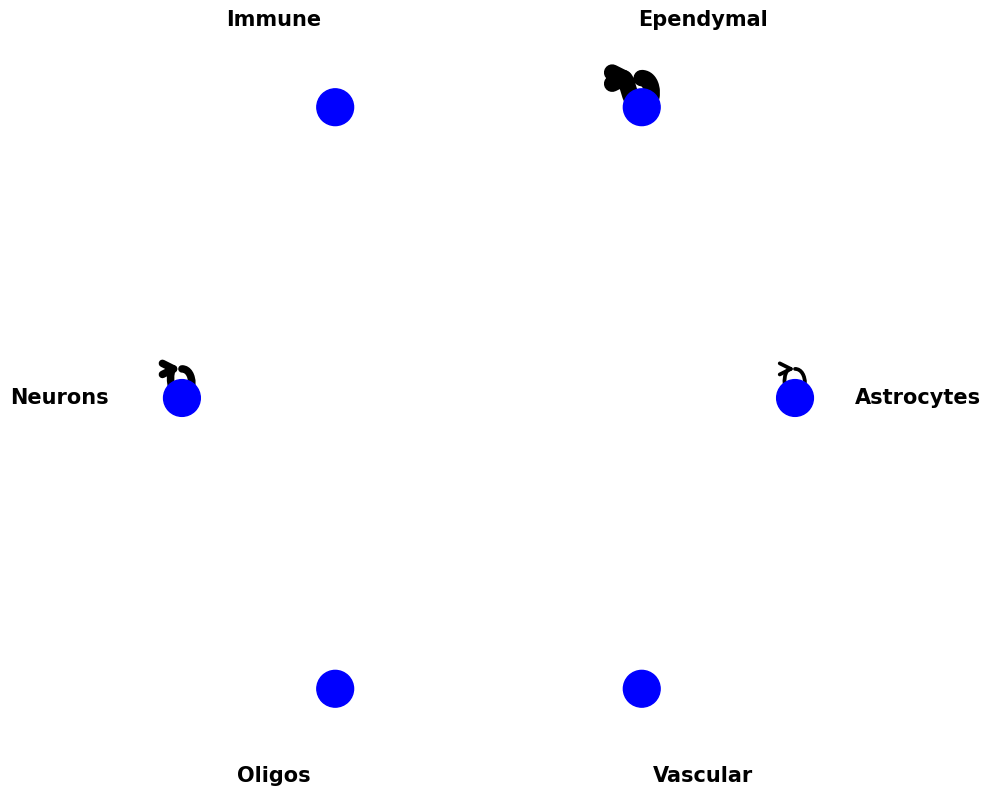

In [23]:
young_clusters = mmcci.an.lr_grouping(young_integrated, n_clusters=0)
young_integrated_clusters = mmcci.an.subset_clusters(young_integrated, young_clusters)
young_overall_clusters = mmcci.an.calculate_cluster_interactions(young_integrated_clusters)

for cluster, matrix in young_overall_clusters.items():
    if matrix is not None:
        print("\ncluster" + str(cluster) + ": Contains " + str(len(young_integrated_clusters[cluster])) + " LR pairs")
        mmcci.plt.network_plot(matrix)

The optimal number of clusters is: 4


/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


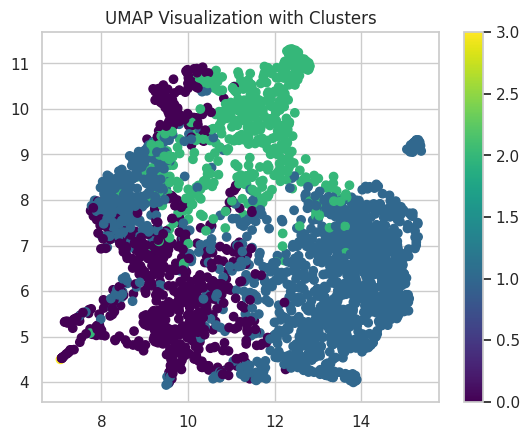

/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/multimodal_cci/analysis.py:440: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  list_anndata[i]
/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/multimodal_cci/analysis.py:448: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  barplot_data.groupby(["cell_type", "LR_Cluster"])["Count"]


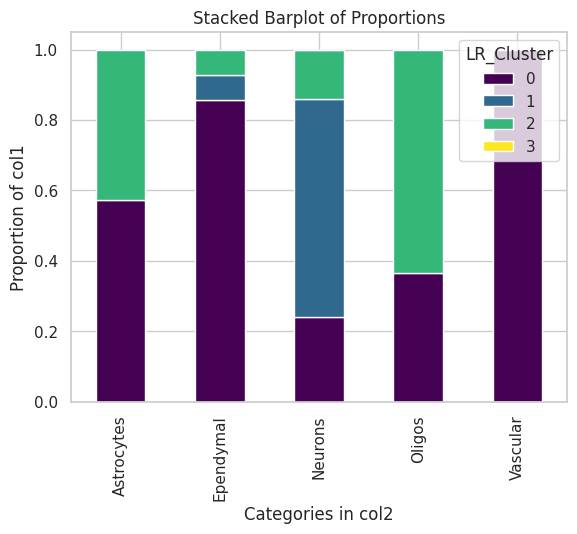

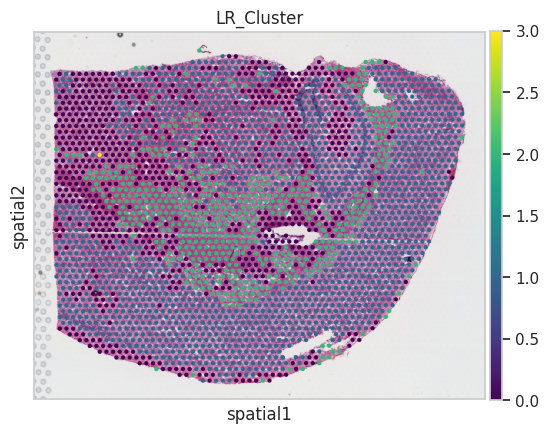

The optimal number of clusters is: 3


/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


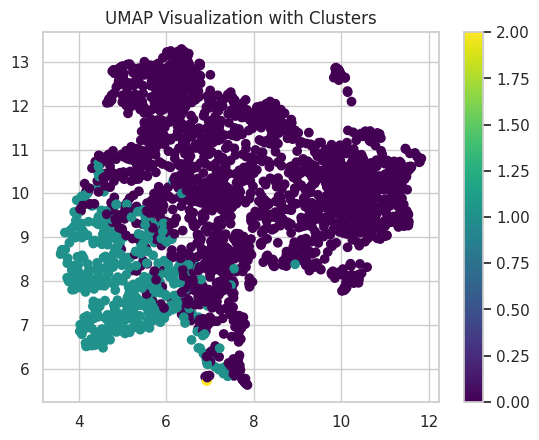

/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/multimodal_cci/analysis.py:440: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  list_anndata[i]
/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/multimodal_cci/analysis.py:448: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  barplot_data.groupby(["cell_type", "LR_Cluster"])["Count"]


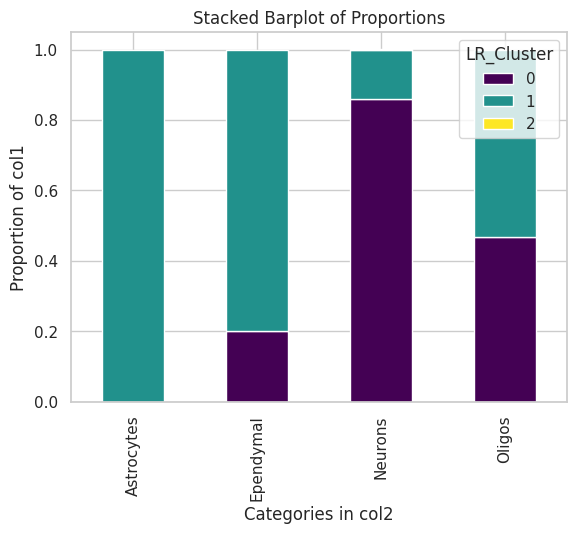

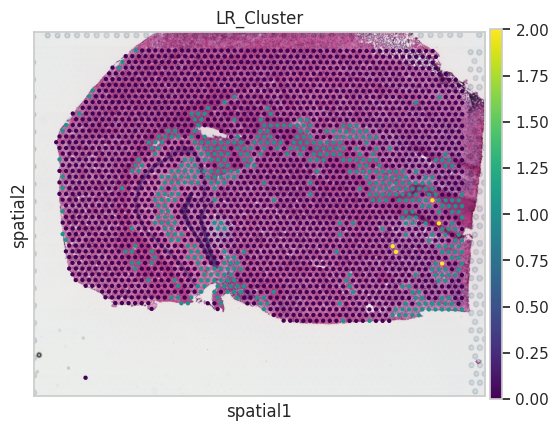

The optimal number of clusters is: 2


/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


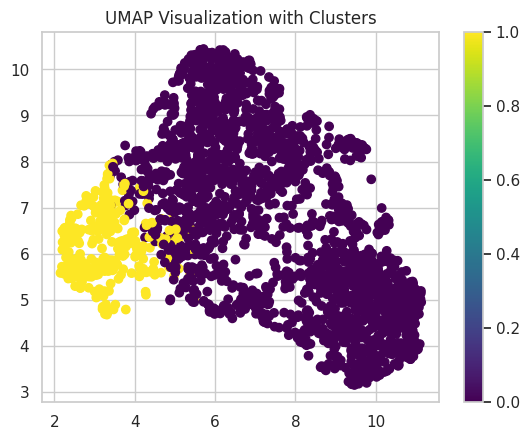

/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/multimodal_cci/analysis.py:440: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  list_anndata[i]
/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/multimodal_cci/analysis.py:448: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  barplot_data.groupby(["cell_type", "LR_Cluster"])["Count"]


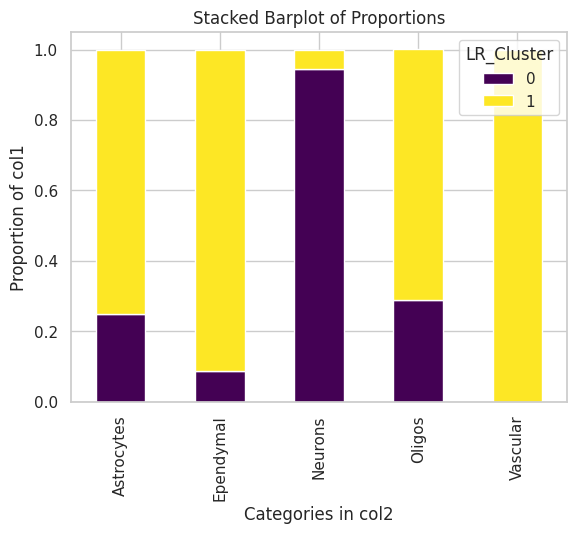

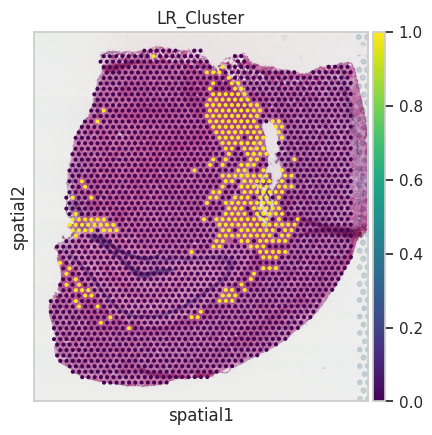

The optimal number of clusters is: 2


/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


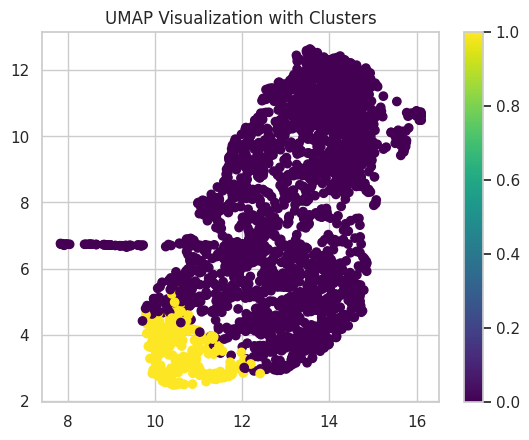

/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/multimodal_cci/analysis.py:440: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  list_anndata[i]
/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/multimodal_cci/analysis.py:448: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  barplot_data.groupby(["cell_type", "LR_Cluster"])["Count"]


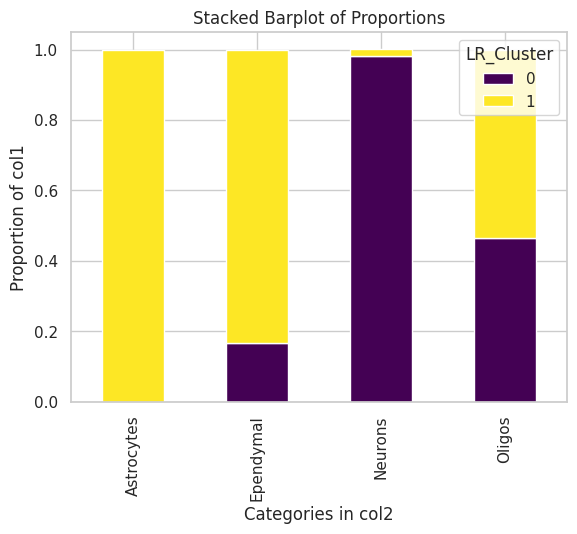

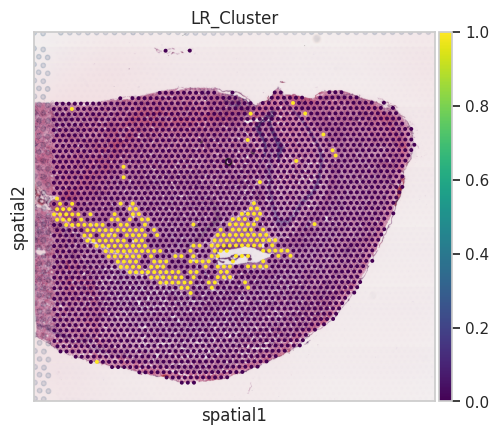

The optimal number of clusters is: 4


/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


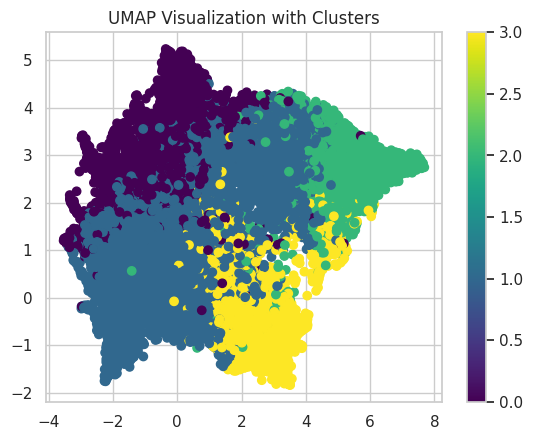

/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/multimodal_cci/analysis.py:440: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  list_anndata[i]
/home/uqlhocke/micromamba/envs/mmcci/lib/python3.9/site-packages/multimodal_cci/analysis.py:448: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  barplot_data.groupby(["cell_type", "LR_Cluster"])["Count"]


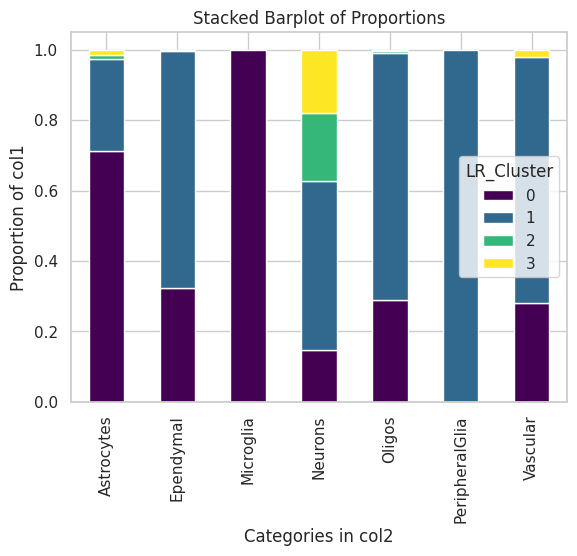

ValueError: When .uns['spatial'][library_id] does not exist, spot_size must be provided directly.

In [25]:
mmcci.an.lr_interaction_clustering(brain_aged_tech1 + brain_aged_tech2 + brain_young_tech1 +  brain_young_tech2)

#### Run GSEA Analysis on Clusters

/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/home/uqlhocke/micromamba/envs/py-env/lib/python3.9/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


Gene_set                                      Term Overlap  \
0    MSigDB_Hallmark_2020         Epithelial Mesenchymal Transition  25/200   
1    MSigDB_Hallmark_2020                              Angiogenesis    6/36   
2    MSigDB_Hallmark_2020                            UV Response Dn   8/144   
3    MSigDB_Hallmark_2020                                 Apoptosis   8/161   
4    MSigDB_Hallmark_2020                                Myogenesis   8/200   
..                    ...                                       ...     ...   
195       KEGG_2021_Human  Human immunodeficiency virus 1 infection   1/212   
196       KEGG_2021_Human                    cAMP signaling pathway   1/216   
197       KEGG_2021_Human                             Thermogenesis   1/232   
198       KEGG_2021_Human                         Parkinson disease   1/249   
199       KEGG_2021_Human                        Huntington disease   1/306   

          P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0    2.058022e-28      8.026285e-27            0                     0   
1    2.179519e-08      4.250063e-07            0                     0   
2    5.853843e-07      7.609996e-06            0                     0   
3    1.362950e-06      1.328876e-05            0                     0   
4    6.834697e-06      5.331064e-05            0                     0   
..            ...               ...          ...                   ...   
195  6.527138e-01      6.693435e-01            0                     0   
196  6.596123e-01      6.721366e-01            0                     0   
197  6.858755e-01      6.945028e-01            0                     0   
198  7.115841e-01      7.160315e-01            0                     0   
199  7.835040e-01      7.835040e-01            0                     0   

     Odds Ratio  Combined Score  \
0     38.081081     2427.693193   
1     42.733333      753.883364   
2     12.776341      183.353240   
3     11.346980      153.250714   
4      9.024267      107.330110   
..          ...             ...   
195    0.952220        0.406233   
196    0.934314        0.388771   
197    0.868893        0.327624   
198    0.808632        0.275147   
199    0.655604        0.159954   

                                                 Genes  
0    NOTCH2;ITGB1;LRP1;SERPINE2;SDC4;LAMA2;LAMA1;FB...  
1                     LRPAP1;VTN;LPL;ITGAV;VEGFA;FGFR1  
2    PDGFRB;COL1A1;NOTCH2;TGFBR3;COL1A2;FZD2;SDC2;CAV1  
3         PDGFRB;TGFBR3;TGFB2;CAV1;BGN;PLAT;PSEN1;CD44  
4    COL1A1;ITGB1;TGFB1;NOTCH1;LAMA2;PLXNB2;FGF2;HBEGF  
..                                                 ...  
195                                              GNAI2  
196                                              GNAI2  
197                                              FGFR1  
198                                              GNAI2  
199                                               TGM2  

[200 rows x 10 columns]

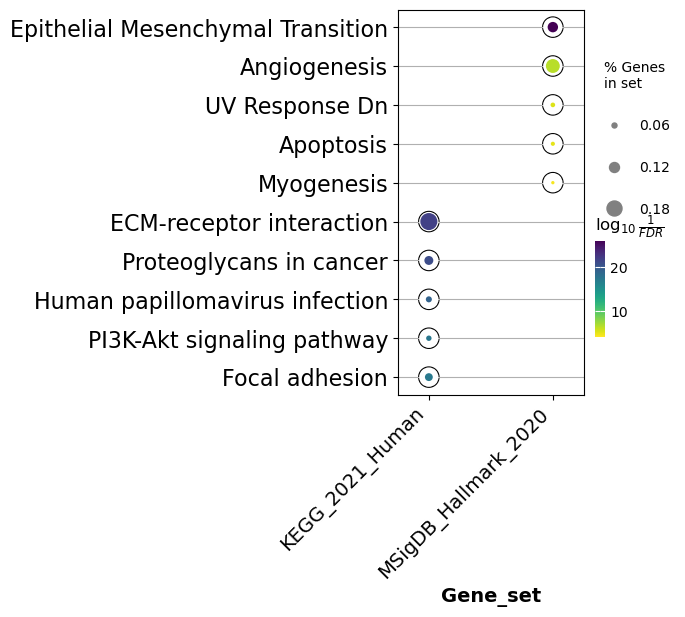

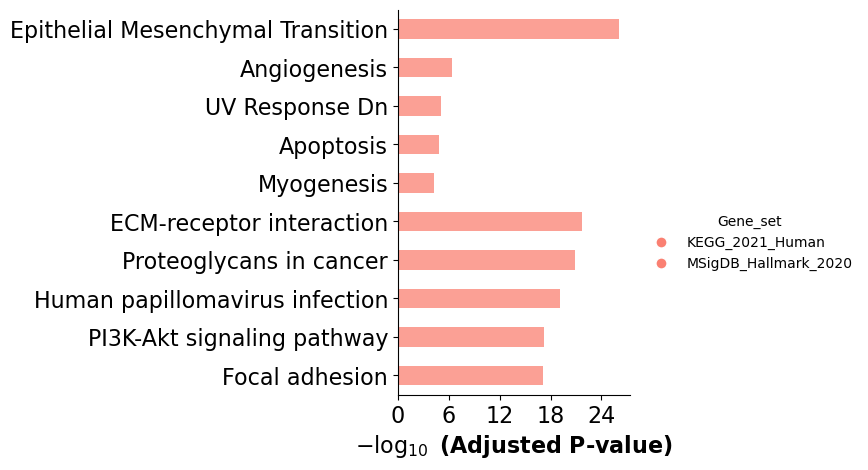

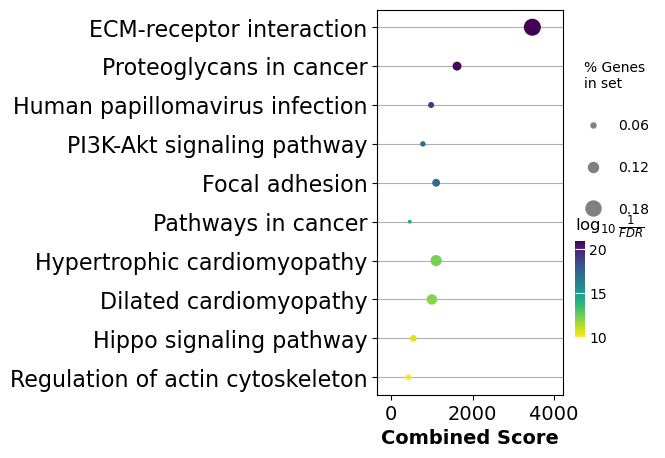

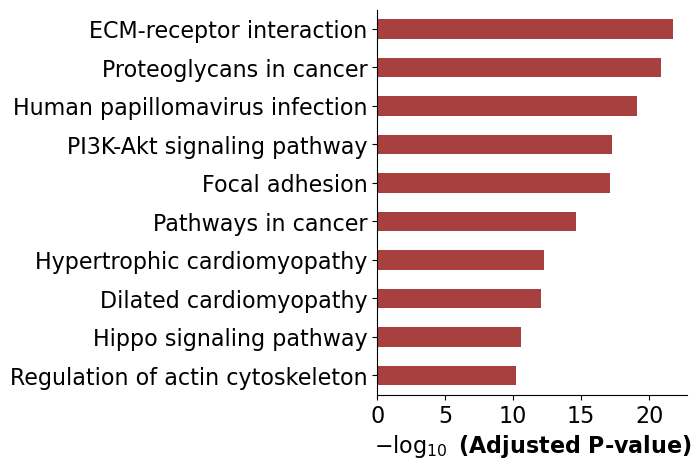

In [22]:
mmcci.an.run_gsea(aged_integrated_clusters[0])